# 1 大O表示法

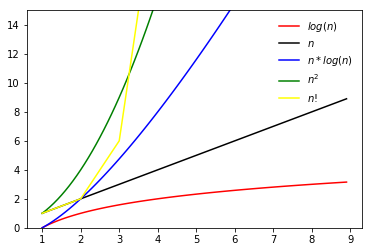

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,9,0.1)
plt.plot(x,np.log2(x),color='red',label='$log(n)$')
plt.legend(loc='upper right',frameon=False)
plt.ylim(0, 15)

plt.plot(x,x,color='black',label='$n$')
plt.legend(loc='upper right',frameon=False)

plt.plot(x,x*np.log2(x),color='blue',label='$n*log(n)$')
plt.legend(loc='upper right',frameon=False)

plt.plot(x,x**2,color='green',label='$n^2$')
plt.legend(loc='upper right',frameon=False)

xn = np.arange(1,9,1)
yn = []
for i in xn:
    yn.append(np.math.factorial(i))
plt.plot(xn,yn,color='yellow',label='$n!$')
plt.legend(loc='upper right',frameon=False)

plt.show()

# 2 排序算法

选择排序：
时间复杂度O(n^2)
（1）每次从头找到最小的元素，放到新的数组，一次操作的时间复杂度为O(n)
（2）针对n个元素，都执行（1）中操作

In [ ]:
def sort(array_in):
    array_out = []
    while len(array_in) > 0:
        min = array_in[0]
        for i in array_in[1:]:
            if min > i:
                min = i
                array_in.pop(i)
        array_out.append(min)
    return array_out

快速排序：
时间复杂度与选取的基准数有关系，平均情况下的时间复杂度O(nlogn)，最糟糕的时间复杂度O(n^2)
（1）利用递归的思想
（2）每次从数组中选一个数i（比如第一个），大于它的放到新的数组A，小于它的放到新的数组B，返回 [A i B]
（3）数组A和数组B分别重复（2）过程

In [ ]:
def qsort(array_in):
    if len(array_in) < 2:
        return array_in
    else:
        base_num = array_in[0]
        array_left = []
        array_right = []
        for i in array_in[1]:
            if i < base_num:
                array_left.append(i)
            else:
                array_right.append(i)
        return qsort(array_left) + [base_num] + qsort(array_right)

合并排序：
时间复杂度O(nlogn)
（1）利用递归的思想
（2）先用二分法，将数组递归拆分成2组，直到最后每组只有1个数（拆分过程O(logn)）
（3）最后使用merge方法，两组一merge（merge过程O(n)）

In [ ]:
def merge_sort(array_in):
    if len(array_in) < 2:
        return array_in
    else:
        array_left = array_in[0:len(array_in)/2]
        array_right = array_in[len(array_in)/2+1:]
        new_array_left = merge_sort(array_left)
        new_array_right = merge_sort(array_right)
        array_out = []
        while len(new_array_left) > 0:
            if len(new_array_right) = 0:
                array_out = array_out + new_array_left
                new_array_left = []
            else if new_array_left[0] < new_array_right[0]:
                array_out.append(new_array_left[0])
                new_array_left.pop(new_array_left[0])
            else:
                array_out.append(new_array_right[0])
                new_array_right.pop(new_array_right[0])
        return array_out

# 3 散列表

In [ ]:
时间复杂度O(1)
散列函数构造方法：
（1）直接定址法  H(key) = a*key+b
（2）数字分析法：特殊情况，从key中找规律，例如key中某些位的组合，刚好是能表示散列空间
（3）除留余数法：H(key) = key mod p
（4）平方取中法：假如有以下关键字序列{421，423，436}，平方之后的结果为{177241，178929，190096}，那么可以取{72，89，00}作为Hash地址。
（5）折叠法：将key拆解为几组，按照不同方式叠加，和的最后几位作为新key
（6）随机数法：H(key) = random(key)